# Execute the code below

In [3]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot  as plt

In [4]:
link = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather2019.csv"
df_weather = pd.read_csv(link)

## You have now a DataFrame with lots of weather data

In [5]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks :
# Let's go in the deep !

## 1 - Merge
OK, you know very well the previous dataset. Now, you want more, much more. Another year for example ?

But it's too bad. The year 2018 is not in the good  shape. There are 2 files :
- The main file with Temperature, etc...
- The opinion file, with especially the Opinion

The goal is [to merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) both files in one DataFrame called **df2018**. It seems both files have a date column with the same format (but not the same name).

Think about checking if both datasets have the same length. If they don't, what kind of merge do you have to do to keep each date of the main dataset ? Then apply this specific merge.

In [6]:
link_main = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)

In [7]:
print(df_main.head())

         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

In [8]:
print(df_opinion.head())

         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


In [9]:
liste_colonnes_opinion = df_opinion.columns.to_list()
print(liste_colonnes_opinion)
liste_colonnes_main = df_main.columns.to_list()
print(liste_colonnes_main)

['date', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION']
['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH', 'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C', 'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C']


In [10]:
# Your code here :
# on va renommer la colonne date avec le meme format que la table main
df_opinion.rename(columns={'date': 'DATE'}, inplace=True)
liste_colonnes_opinion = df_opinion.columns.to_list()
print(liste_colonnes_opinion)

['DATE', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION']


In [11]:
#  jointure en prenant les 2 dataframe complets avec outer
df2018 = df_main.merge(df_opinion, how='outer', on='DATE')

df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

In [12]:
df2018.shape

(365, 20)

### Result

Your DataFrame **df2018** should now have 21 columns and 365 rows. If not, try again.

**Be careful:**
- if you've renamed your `date` column, then merged both DataFrames with `on` parameter, Pandas kept only one `DATE` column. So you'll have 20 columns in your DataFrame. And you can skip the "drop" step just after.
- if you merged with `left_on` and `right_on` parameters, Pandas kept both columns `DATE` and `date`, and you'll have 21 columns in your DataFrame. You can do this "drop" step:



In [ ]:
# You should now probably drop the "date" column.
# This column is incomplete, it were provided from the opinion file.
# It was very useful to perform the "merge". But we don't need it anymore.

# Read and execute the code below :
df2018.drop('date',             # Select column to drop
            # Precise if you want to drop a column (1) or a row (0)
            axis=1,
            inplace=True)     # If we don't use this argument, result is not stored

Now, everybody should have a 20 columns and 365 rows.

**Ohhhh, there are some missing values, we have to fill them. That will be the goal of this quest: to learn how to fill in the missing values, column by column, with different techniques.**

In [ ]:
# Just execute the code below, to display a "non-null" column :
print("My DataFrame shape is : ", df2018.shape, end='\n\n\n\n')
print('Which columns have missing values ? (Non-null column)')
print(df2018.info())

My DataFrame shape is :  (365, 20)



Which columns have missing values ? (Non-null column)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEW

### Find and display the Dates of missing values.
You can help you with the method `.isna()`

You have to find 24 different dates.

In [ ]:
# Your code here :
# toutes les colonnes ayant des valeurs nulles
df2018.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
360    False
361    False
362    False
363    False
364    False
Length: 365, dtype: bool

In [ ]:
# valeurs nulle de la colonne DATE
# filtre_valeur_nulle = df2018[df2018.isna().any(axis=1) ]
filtre_valeur_nulle = df2018['DATE'][df2018.isna().any(axis=1)].to_list()
# df2018.loc[filtre_valeur_nulle,'DATE']
print("Nombre de dates: ", len(filtre_valeur_nulle),
      "\nliste des dates dont les colonnes ont des valeurs nulles: \n", filtre_valeur_nulle)

Nombre de dates:  24 
liste des dates dont les colonnes ont des valeurs nulles: 
 ['2018-01-19', '2018-02-01', '2018-03-08', '2018-04-11', '2018-04-29', '2018-05-24', '2018-06-02', '2018-06-13', '2018-06-15', '2018-06-25', '2018-07-04', '2018-07-11', '2018-07-14', '2018-07-17', '2018-07-24', '2018-08-09', '2018-08-14', '2018-08-23', '2018-09-24', '2018-11-14', '2018-11-18', '2018-11-22', '2018-12-13', '2018-12-16']


## 2 - Before filling missing values, you have to create a new axis "flag", to document and to remember which lines you modify.

In [ ]:
# Just execute the code below :
df2018['flag'] = df2018['OPINION'].isna()
df2018['flag'].value_counts()

flag
False    341
True      24
Name: count, dtype: int64

In [ ]:
# filtre les lignes à True de la colonne flag
filtre_flag = df2018[df2018['flag'] == True]
# filtre les noms des colonnescontenant des valeurs nulles en utilisant le filtre precedent
noms_colonne_avec_des_na = filtre_flag.columns[filtre_flag.isna(
).any()].tolist()
print(noms_colonne_avec_des_na)

In [ ]:
#  en une seule ligne
df2018[df2018['flag'] == True].columns[df2018[df2018['flag'] == True].isna().any()].tolist()

['WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION']

## 3 - Visualize and Fill the NaN

### 3.1 - First column : WEATHER_CODE_EVENING

You have to visualize how are the well-filled data. Of course you know Matplotlib, and maybe, you know Seaborn and Plotly. But, did you know that Pandas integrate directly some parts of Matplotlib ? It's very useful, and don't need to import other libraries...

#### Scatterplot directly with Pandas

c:\ProgramData\Anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


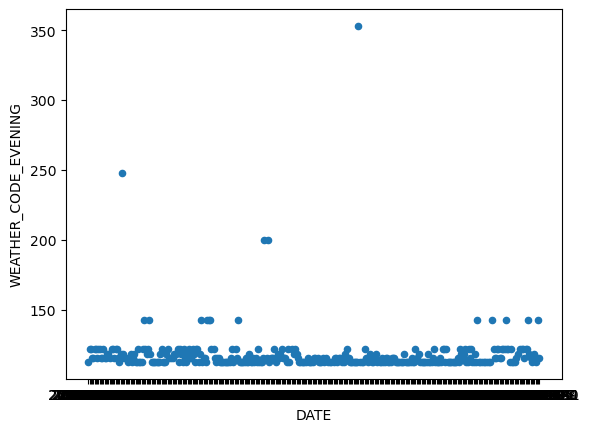

In [ ]:
# Draw a scatterplot with Date on X-axis and WEATHER_CODE_EVENING on Y-axis

df2018.plot.scatter(x='DATE', y='WEATHER_CODE_EVENING',
                    colormap='viridis')  # Code to complete

plt.show()

#### Boxplot directly with Pandas

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

<Axes: >

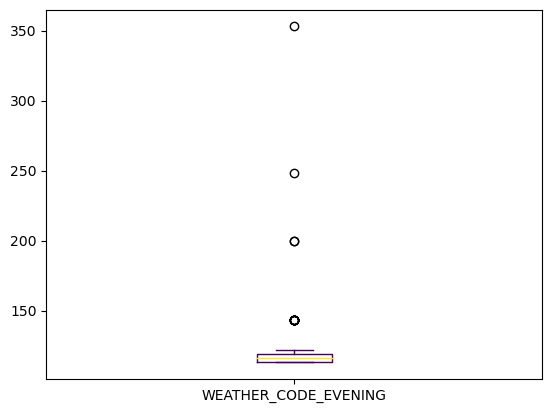

In [ ]:
# Find a way to draw directly with pandas a boxplot on the column WEATHER_CODE_EVENING
df2018['WEATHER_CODE_EVENING'].plot(kind='box', colormap='viridis')

#### Deciles

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)

In [17]:
# Calcul des deciles avec liste en comprehension
deciles = [i/10 for i in range(1, 10)]
# boucle sur chaque decile pour afficher la valeur
for decile in deciles:
    value = df2018["WEATHER_CODE_EVENING"].quantile(decile)
    print(f"{decile*100:.1f}% decile= {value}")  # formatage des deciles en %

# Calcule du minimum et du maximum
minimum = df2018["WEATHER_CODE_EVENING"].min()
maximum = df2018["WEATHER_CODE_EVENING"].max()


print(f"Minimum: {minimum}")
print(f"Maximum: {maximum}")

10.0% decile= 113.0
20.0% decile= 113.0
30.0% decile= 113.0
40.0% decile= 113.0
50.0% decile= 116.0
60.0% decile= 116.0
70.0% decile= 119.0
80.0% decile= 122.0
90.0% decile= 122.0
Minimum: 113.0
Maximum: 353.0


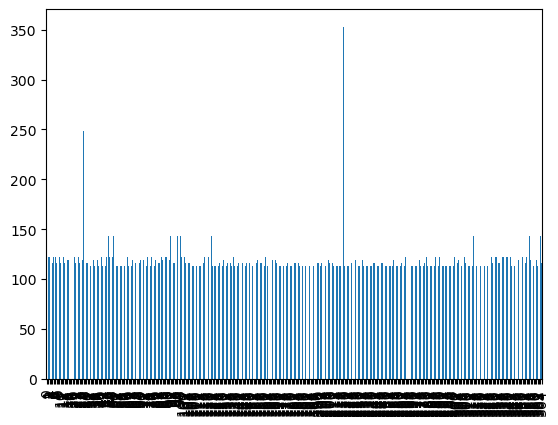

In [192]:
values = [minimum] + [deciles] + [maximum]

# Graphique à barres avec les values
ax = df2018['WEATHER_CODE_EVENING'].plot(kind='bar', y=values)

# Ajout des étiquettes

#### Fill values
OK it seems that the most of datas are between 113 and 122. Maybe, we could fill the missing values with Mean or Median, it's up to you to choose. So you need :
- Calculate the mean or the median
- Fill the missing values only for **WEATHER_CODE_EVENING** with the `fillna()` method

When you're OK, remember tu use the `inplace=True` argument, otherwise, your modification will not be stored.

In [22]:
# Hop ! Your code here :

mean_snow_column = df2018['WEATHER_CODE_EVENING'].mean()
median_weather_column = df2018['WEATHER_CODE_EVENING'].median()
print(mean_snow_column, median_weather_column)
df2018['WEATHER_CODE_EVENING'].fillna(median_weather_column,
                                      inplace=True)  # When you are OK, you can replace this argument by True
df2018['WEATHER_CODE_EVENING'].value_counts()

118.50733137829911 116.0


WEATHER_CODE_EVENING
113.0    154
116.0    102
122.0     59
119.0     34
143.0     12
200.0      2
248.0      1
353.0      1
Name: count, dtype: int64

In [23]:
# You can use this code to check how many missing values you have :
column_name = 'WEATHER_CODE_EVENING'
print("I have ", df2018[column_name].isna().sum(),
      "missing values in the column", column_name)

I have  0 missing values in the column WEATHER_CODE_EVENING


### 3.2 - Next columns : TOTAL_SNOW_MM and UV_INDEX

We trust you to choose right values to fill for both columns

In [43]:
# TOTAL_SNOW_MM   comme il n'a pas neigé à cette période nous avons zero ce qui est normal, donc nous ne faisons rien
df2018["TOTAL_SNOW_MM"].describe()
df2018["TOTAL_SNOW_MM"].isna().any().sum()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: TOTAL_SNOW_MM, dtype: float64

In [57]:
df2018["TOTAL_SNOW_MM"][df2018["TOTAL_SNOW_MM"].isna()]

Series([], Name: TOTAL_SNOW_MM, dtype: float64)

In [36]:
# UV_INDEX il nous manque juste une seule valeur
df2018["UV_INDEX"].describe()

count    341.000000
mean       1.574780
std        1.126346
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: UV_INDEX, dtype: float64

In [46]:
df2018["UV_INDEX"]

0      3.0
1      3.0
2      3.0
3      3.0
4      3.0
      ... 
360    1.0
361    1.0
362    1.0
363    1.0
364    1.0
Name: UV_INDEX, Length: 365, dtype: float64

In [59]:
df2018["DATE"][df2018["UV_INDEX"].isna()]

18     2018-01-19
31     2018-02-01
66     2018-03-08
100    2018-04-11
118    2018-04-29
143    2018-05-24
152    2018-06-02
163    2018-06-13
165    2018-06-15
175    2018-06-25
184    2018-07-04
191    2018-07-11
194    2018-07-14
197    2018-07-17
204    2018-07-24
220    2018-08-09
225    2018-08-14
234    2018-08-23
266    2018-09-24
317    2018-11-14
321    2018-11-18
325    2018-11-22
346    2018-12-13
349    2018-12-16
Name: DATE, dtype: object

In [ ]:
df2018["UV_INDEX"].isna().any().sum()

In [ ]:
df2018["UV_INDEX"].isna().any().sum()

In [42]:
df2018["UV_INDEX"].isna().any().sum()

1

In [ ]:
deciles = [i/10 for i in range(1, 10)]
for decile in deciles:
    value_snow = df2018["TOTAL_SNOW_MM"].quantile(
        deciles)
    print(f"{decile*100:.1f}% decile= {value_snow}")

In [ ]:
values_TOTAL_SNOW_MM = [df2018['TOTAL_SNOW_MM'].min(
)] + [deciles] + [df2018['TOTAL_SNOW_MM'].max()]
df2018['TOTAL_SNOW_MM'].plot(
    kind='bar', colormap='viridis', y=values_TOTAL_SNOW_MM)
mean_snow_column = df2018['TOTAL_SNOW_MM'].mean()
median_snow_column = df2018['TOTAL_SNOW_MM'].median()
print("moyenne ",mean_snow_column,"mediane",median_snow_column)
df2018['TOTAL_SNOW_MM'].fillna(mean_snow_column,
                                      inplace=True)  # When you are OK, you can replace this argument by True
df2018['TOTAL_SNOW_MM'].value_counts()

In [ ]:
# UV_INDEX 
values_UV_INDEX = [minimum] + [deciles] + [maximum]
df2018['UV_INDEX'].plot(
    kind='bar', colormap='viridis', y=values_UV_INDEX)

### 3.3 - Next column :
SUNHOUR

In [ ]:
# Draw a scatterplot with Date on X-axis and SUNHOUR on Y-axis

#### Propagation
**It seems this is not a good idea to apply the same value all year long...**

You could use the the `method = 'ffill'` or `'bfill'` argument in `fillna()` to propagate non-null values forward or backward.

In [ ]:
# Your code here

### 3.4 - Column : OPINION
For Opinion, we have not yet idea. So, we can write a new value 'unknown' in this column.

In [ ]:
# Your code here

## Now, each axis should have 365 non-null values.

In [ ]:
df2018.info()

## 4 - Visualize your modifications
Draw 4 scatterplots with Date on X-axis, and each of the 4 numeric modified columns on Y-axis :
- The original datas will be in blue
- The new data (your datas) in red

It's the moment to use your "flag" column created at the beginning. It'll be easier in seaborn with `hue` argument.

You should get something like this:

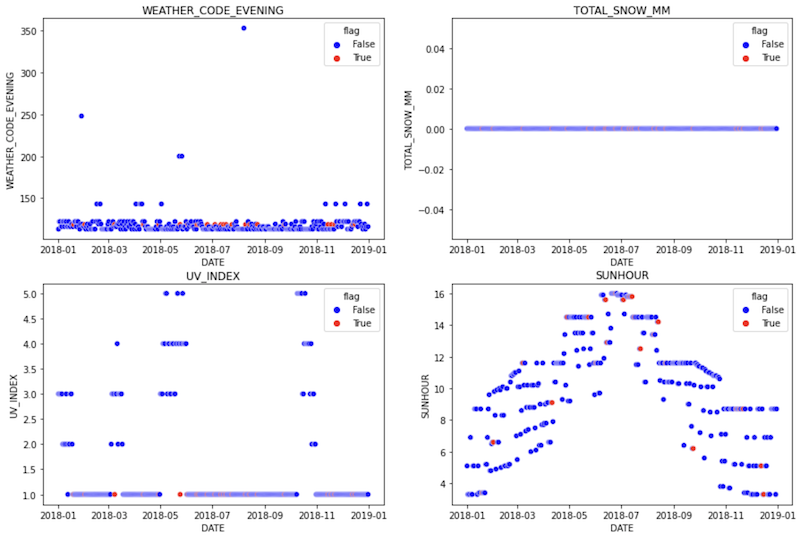

In [ ]:
# Your code here